# Fraud Detection

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import classification_report , accuracy_score, confusion_matrix

from sklearn.ensemble import RandomForestClassifier


In [2]:
df = pd.read_csv('Fraud.csv') # reading dataset
df.shape

(6362620, 11)

In [3]:
df.head() # first five records

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.dtypes # type of variables 

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [6]:
# checking null values in the dataset
print('number of null values in each features')
for col in df.columns :
    print(col, ':', df[col].isnull().sum())

step : 0
type : 0
amount : 0
nameOrig : 0
oldbalanceOrg : 0
newbalanceOrig : 0
nameDest : 0
oldbalanceDest : 0
newbalanceDest : 0
isFraud : 0
isFlaggedFraud : 0


In [7]:
df.describe() #statistical summary of a DataFrame for numerical variables 

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [8]:
df.describe(include = 'O').T # statistical summary of a DataFrame for categorical varibles

,count,unique,top,freq
type,6362620,5,CASH_OUT,2237500
nameOrig,6362620,6353307,C1902386530,3
nameDest,6362620,2722362,C1286084959,113


In [9]:
cat_var = [feature for feature in df.columns if df[feature].dtypes == 'O' ]
cat_var # seperating categorical variables 

['type', 'nameOrig', 'nameDest']

In [10]:
num_var = [feature for feature in df.columns if feature not in cat_var]
num_var  # seperating numerical variables 

['step',
 'amount',
 'oldbalanceOrg',
 'newbalanceOrig',
 'oldbalanceDest',
 'newbalanceDest',
 'isFraud',
 'isFlaggedFraud']

In [11]:
for col in df.columns :
    print(col,':',df[col].nunique())  # number of unique values in each column

step : 743
type : 5
amount : 5316900
nameOrig : 6353307
oldbalanceOrg : 1845844
newbalanceOrig : 2682586
nameDest : 2722362
oldbalanceDest : 3614697
newbalanceDest : 3555499
isFraud : 2
isFlaggedFraud : 2


In [15]:
df.drop_duplicates(keep = 'first',inplace=True) # checking duplicate record 
print(df.shape)

(6362620, 11)


In [16]:
# Merchants
mer = df[df['nameDest'].str.contains('M')] #there is not information for customers that start with M (Merchants).
                                            # for oldbalanceOrg and newbalanceOrig
mer.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0,0


In [17]:
mer.shape # total number of customers start with M (Merchants).

(2151495, 11)

C:\Users\pramod\AppData\Local\Temp\ipykernel_10440\126802512.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<Axes: >

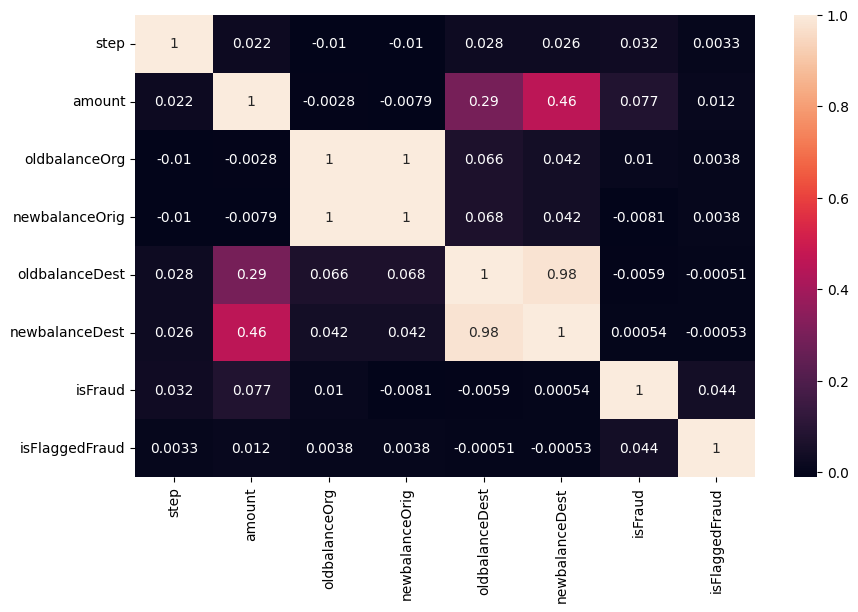

In [19]:
corr=df.corr() # correlation coefficients between all pairs of variables in the dataset

plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

**oldbalanceDest and  newbalanceDest are highly correlated(0.98)**

In [20]:
count_classes = df['isFraud'].value_counts() #counts the number of occurrences of each unique value in the 'isFraud'
count_classes

0    6354407
1       8213
Name: isFraud, dtype: int64

**This dataset is imbalanced the non-fraudulent transactions represent 99% of the data and the fraudulent transactions represent 1%.**

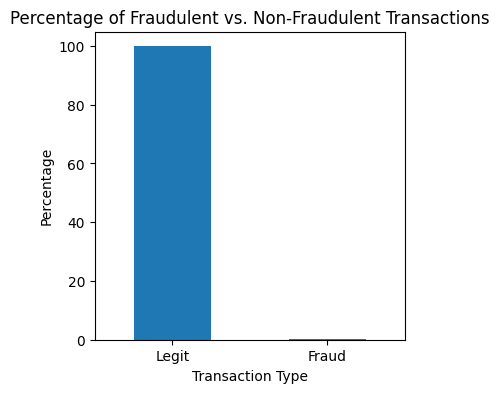

In [21]:
plt.figure(figsize=(4,4))
labels = ["Legit", "Fraud"]
count_classes = df['isFraud'].value_counts(normalize= True)*100
count_classes.plot(kind = "bar", rot = 0)
plt.title('Percentage of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel("Percentage")
plt.xlabel('Transaction Type')

plt.xticks(range(2), labels)
plt.show()

In [24]:
discrete_feature = [feature for feature in num_var if len(df[feature].unique())<15 and feature]
print("Discrete Variables Count: {}".format(len(discrete_feature)), discrete_feature)

Discrete Variables Count: 2 ['isFraud', 'isFlaggedFraud']


In [25]:
continuous_feature=[feature for feature in num_var if feature  not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)), continuous_feature)

Continuous feature Count 6 ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']


In [26]:
df[continuous_feature]

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1,9839.64,170136.00,160296.36,0.00,0.00
1,1,1864.28,21249.00,19384.72,0.00,0.00
2,1,181.00,181.00,0.00,0.00,0.00
3,1,181.00,181.00,0.00,21182.00,0.00
4,1,11668.14,41554.00,29885.86,0.00,0.00
...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0.00,339682.13
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11
6362618,743,850002.52,850002.52,0.00,0.00,0.00


# Histogram, Variable quantiles and Boxplot

In [27]:
import scipy.stats as stats
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

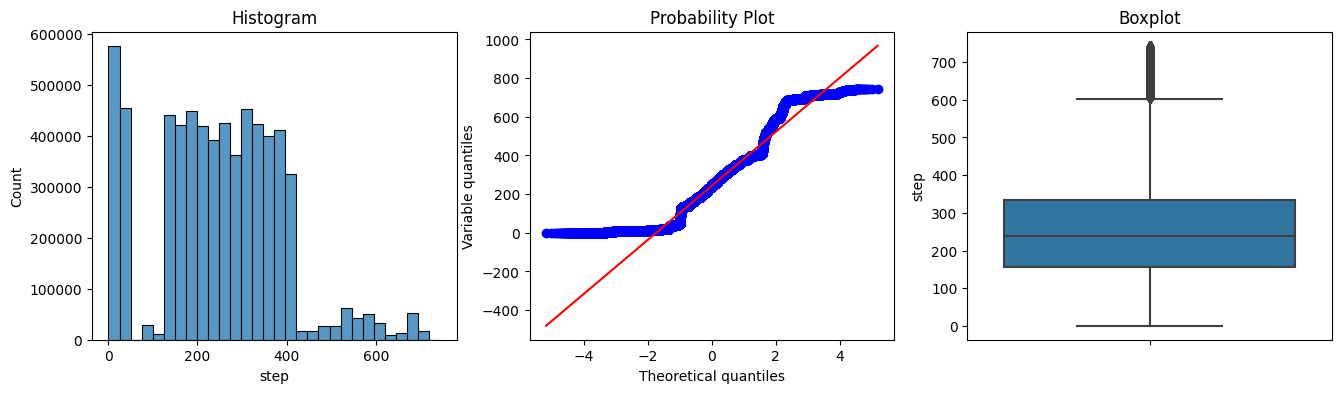

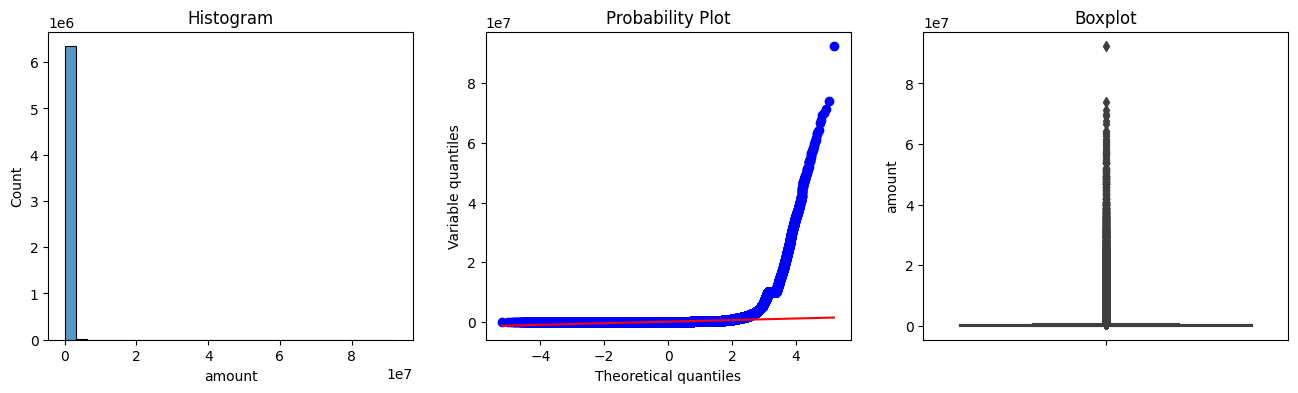

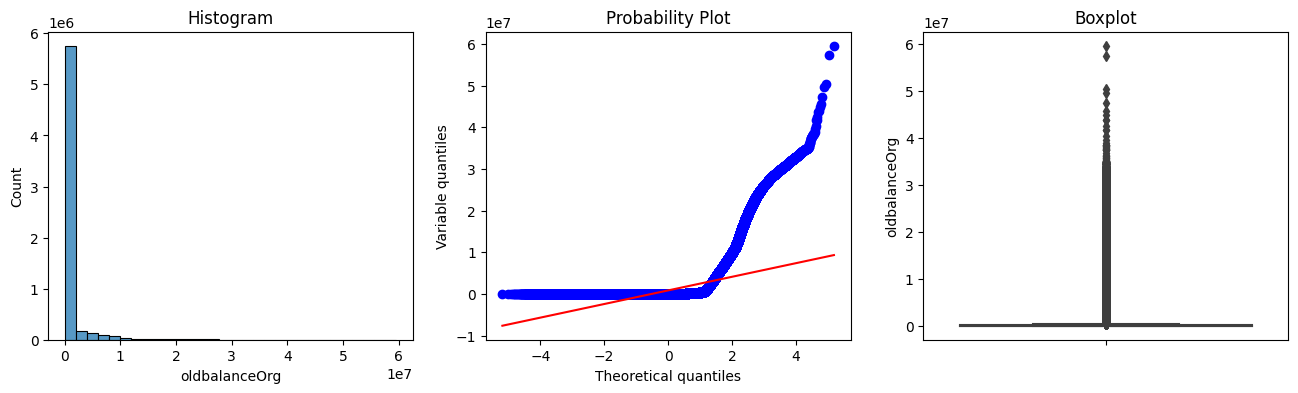

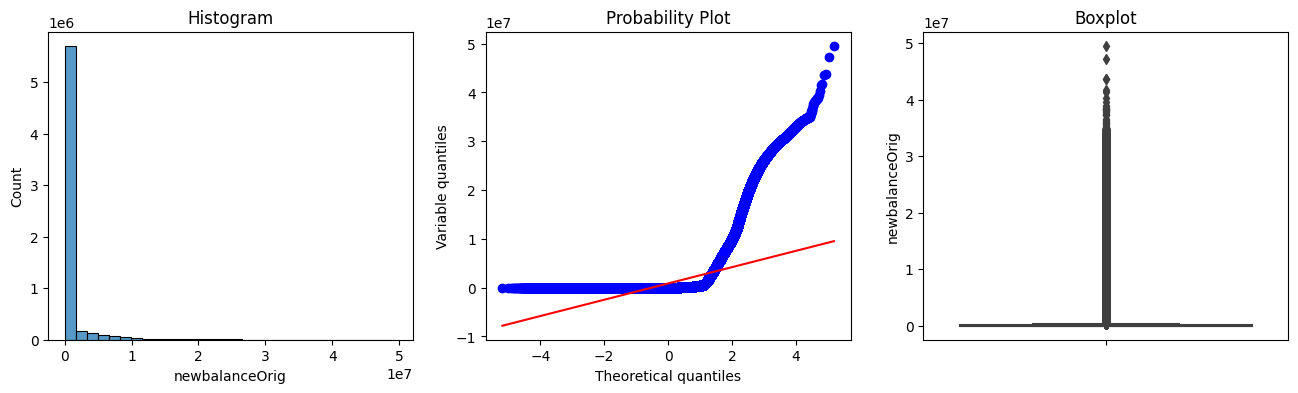

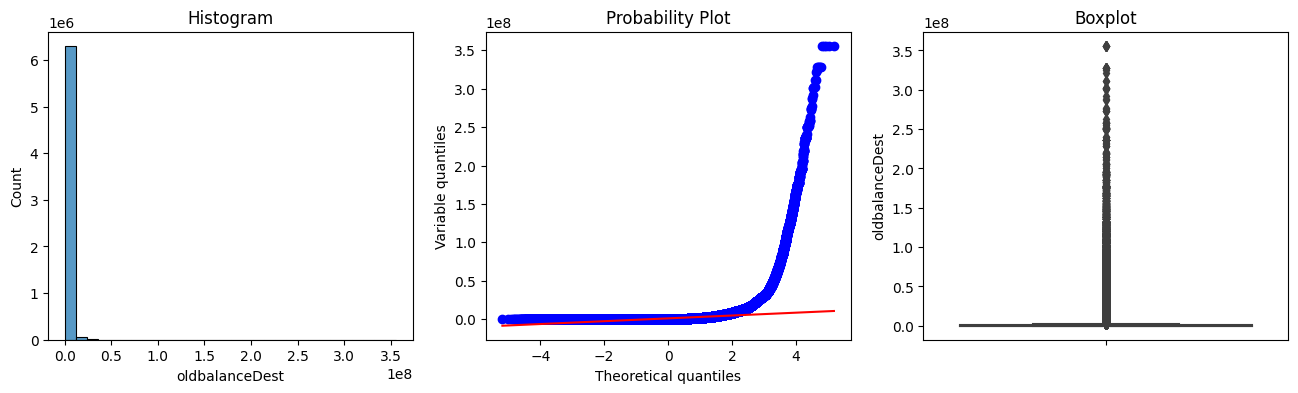

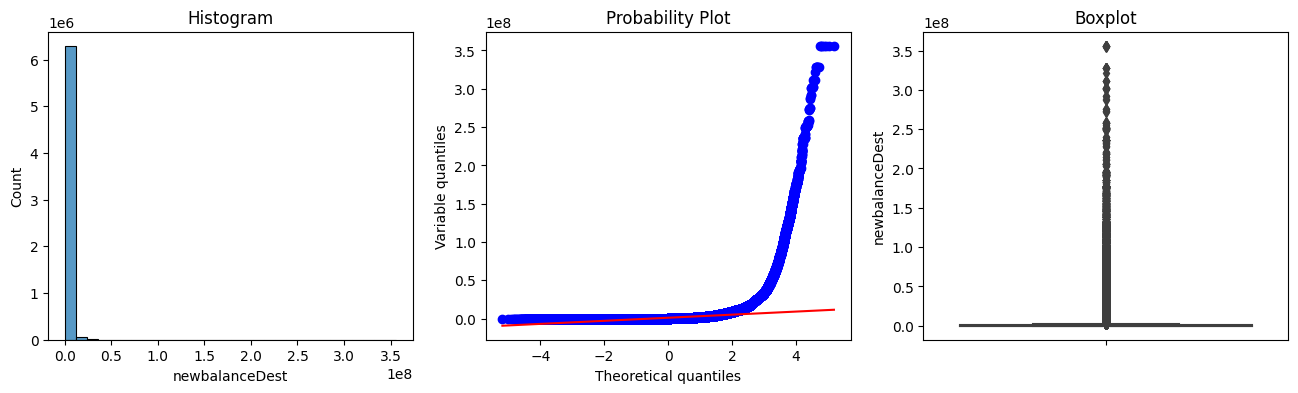

In [28]:
for feature in continuous_feature :

    diagnostic_plots(df, feature)

# correlated features 

In [29]:

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns , set does not allow duplicates
    corr_matrix = dataset.corr()
    print('Highly correlated features are listed below')
    print()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):

            if (corr_matrix.iloc[i, j]) > threshold: 
                colnamei = corr_matrix.columns[i]  # getting the name of column
                colnamej = corr_matrix.columns[j] 
                print(colnamei, ':',  colnamej, ':',corr_matrix.iloc[i, j] )
                col_corr.add(colnamei)
    print()
    print('Total number of columns :', len(col_corr))
    print()
    return col_corr

In [30]:
corr_features= correlation(df, 0.90)
print(corr_features)

C:\Users\pramod\AppData\Local\Temp\ipykernel_10440\2590375593.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dataset.corr()


Highly correlated features are listed below

newbalanceOrig : oldbalanceOrg : 0.9988027631723787
newbalanceDest : oldbalanceDest : 0.9765685054474923

Total number of columns : 2

{'newbalanceDest', 'newbalanceOrig'}


# Removing correlated features 

In [32]:
df1 = df.drop(corr_features,axis=1)
df1.head()

,step,type,amount,nameOrig,oldbalanceOrg,nameDest,oldbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,M1979787155,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,M2044282225,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,C553264065,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,C38997010,21182.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,M1230701703,0.0,0,0


In [36]:
df2 = df1.drop(['nameOrig', 'nameDest'], axis = 1) # Dropping ID columns that have very little variance 
df2.head()

,step,type,amount,oldbalanceOrg,oldbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,0.0,0,0
2,1,TRANSFER,181.00,181.0,0.0,1,0
3,1,CASH_OUT,181.00,181.0,21182.0,1,0
4,1,PAYMENT,11668.14,41554.0,0.0,0,0


# converting categorical variables into numerical variables 

In [41]:
df3 = pd.get_dummies(df2 ,columns =['type'], drop_first = True)
df3.head()

,step,amount,oldbalanceOrg,oldbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,0.0,0,0,0,0,1,0
1,1,1864.28,21249.0,0.0,0,0,0,0,1,0
2,1,181.00,181.0,0.0,1,0,0,0,0,1
3,1,181.00,181.0,21182.0,1,0,1,0,0,0
4,1,11668.14,41554.0,0.0,0,0,0,0,1,0


In [43]:
x = df3.drop('isFraud', axis = 1) # the independent variable(s) are assigned to x and
y = df['isFraud'] # the dependent variable or target variable is assigned to y.


In [44]:
#split the data into training and testing sets for both the independent and dependent variables.
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size = 0.2, stratify = y, random_state= 1000)

In [45]:
print('Shape of X_train :',X_train.shape)
print('Shape of y_train :',y_train.shape)
print('Shape of X_test :',X_test.shape)
print('Shape of y_test :',y_test.shape)

Shape of X_train : (5090096, 9)
Shape of y_train : (5090096,)
Shape of X_test : (1272524, 9)
Shape of y_test : (1272524,)


In [50]:
y_train.value_counts(normalize = True)*100, y_test.value_counts(normalize = True)*100

(0    99.870926
 1     0.129074
 Name: isFraud, dtype: float64,
 0    99.870887
 1     0.129113
 Name: isFraud, dtype: float64)

In [52]:
num = ['step', 'amount', 'oldbalanceOrg', 'oldbalanceDest']

# feature scaling on the numerical columns of the dataset.

In [53]:
scaler = StandardScaler()
scaler.fit(X_train[num]) #  computes the mean and standard deviation of each numerical feature

X_train[num] = scaler.transform(X_train[num])
X_test[num] = scaler.transform(X_test[num])

In [54]:
X_train.head()

,step,amount,oldbalanceOrg,oldbalanceDest,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
5522754,0.960024,-0.295062,-0.248782,-0.325590,0,0,0,1,0
3742791,0.250409,-0.287252,-0.277738,-0.325590,0,0,0,1,0
2220399,-0.402998,0.045540,-0.288723,0.057477,0,1,0,0,0
1358072,-0.740241,-0.161751,-0.287251,-0.325590,0,1,0,0,0
57562,-1.646581,-0.071344,-0.265624,-0.324101,0,1,0,0,0


# Model Building

# DecisionTreeClassifier

In [63]:

clf_dt = DecisionTreeClassifier(max_depth=4 , class_weight = {0: 1, 1: 5}, random_state=1000)
clf_dt.fit(X_train, y_train)

y_pred_train = clf_dt.predict(X_train)
y_pred_test = clf_dt.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train,y_pred_train))
print("Test Accuracy:",accuracy_score(y_test,y_pred_test))

print('Train classification_report')
print(classification_report(y_train,y_pred_train))
print('Test classification_report')
print( classification_report(y_test,y_pred_test))


print('Train confusion_matrix')
print(confusion_matrix(y_train, y_pred_train))
print('Test confusion_matrix')
print(confusion_matrix(y_test, y_pred_test))

Train Accuracy: 0.998954243692064
Test Accuracy: 0.9989956967412795
Train classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   5083526
           1       0.73      0.30      0.43      6570

    accuracy                           1.00   5090096
   macro avg       0.86      0.65      0.71   5090096
weighted avg       1.00      1.00      1.00   5090096

Test classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.76      0.33      0.46      1643

    accuracy                           1.00   1272524
   macro avg       0.88      0.66      0.73   1272524
weighted avg       1.00      1.00      1.00   1272524

Train confusion_matrix
[[5082786     740]
 [   4583    1987]]
Test confusion_matrix
[[1270712     169]
 [   1109     534]]


# RandomForestClassifier

In [84]:
clf_rf = RandomForestClassifier(n_estimators= 25 , max_depth = 10,max_samples= 0.8, random_state= 1000)


clf_rf.fit(X_train, y_train)

y_pred_train = clf_rf.predict(X_train)
y_pred_test = clf_rf.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train,y_pred_train))
print("Test Accuracy:",accuracy_score(y_test,y_pred_test))

print('Train classification_report')
print(classification_report(y_train,y_pred_train))
print('Test classification_report')
print( classification_report(y_test,y_pred_test))


print('Train confusion_matrix')
print(confusion_matrix(y_train, y_pred_train))
print('Test confusion_matrix')
print(confusion_matrix(y_test, y_pred_test))

Train Accuracy: 0.9993017813416486
Test Accuracy: 0.999332822013573
Train classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   5083526
           1       0.98      0.47      0.63      6570

    accuracy                           1.00   5090096
   macro avg       0.99      0.73      0.82   5090096
weighted avg       1.00      1.00      1.00   5090096

Test classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.98      0.49      0.66      1643

    accuracy                           1.00   1272524
   macro avg       0.99      0.75      0.83   1272524
weighted avg       1.00      1.00      1.00   1272524

Train confusion_matrix
[[5083474      52]
 [   3502    3068]]
Test confusion_matrix
[[1270865      16]
 [    833     810]]


# XGBClassifier

In [89]:
import xgboost
from xgboost import XGBClassifier
XGB_model = XGBClassifier(n_estimators=30 , max_depth = 30, random_state = 1000)
XGB_model.fit(X_train, y_train)

y_pred_train = XGB_model.predict(X_train)
y_pred_test = XGB_model.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train,y_pred_train))
print("Test Accuracy:",accuracy_score(y_test,y_pred_test))

print('Train classification_report')
print(classification_report(y_train,y_pred_train))
print('Test classification_report')
print( classification_report(y_test,y_pred_test))


print('Train confusion_matrix')
print(confusion_matrix(y_train, y_pred_train))
print('Test confusion_matrix')
print(confusion_matrix(y_test, y_pred_test))

Train Accuracy: 0.9999296673382978
Test Accuracy: 0.9996487296113865
Train classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   5083526
           1       1.00      0.95      0.97      6570

    accuracy                           1.00   5090096
   macro avg       1.00      0.97      0.99   5090096
weighted avg       1.00      1.00      1.00   5090096

Test classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.92      0.80      0.85      1643

    accuracy                           1.00   1272524
   macro avg       0.96      0.90      0.93   1272524
weighted avg       1.00      1.00      1.00   1272524

Train confusion_matrix
[[5083512      14]
 [    344    6226]]
Test confusion_matrix
[[1270765     116]
 [    331    1312]]


In [93]:
import xgboost
from xgboost import XGBClassifier
XGB_model = XGBClassifier(n_estimators= 200 , max_depth = 100, random_state = 1234)
XGB_model.fit(X_train, y_train)

y_pred_train = XGB_model.predict(X_train)
y_pred_test = XGB_model.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train,y_pred_train))
print("Test Accuracy:",accuracy_score(y_test,y_pred_test))

print('Train classification_report')
print(classification_report(y_train,y_pred_train))
print('Test classification_report')
print( classification_report(y_test,y_pred_test))


print('Train confusion_matrix')
print(confusion_matrix(y_train, y_pred_train))
print('Test confusion_matrix')
print(confusion_matrix(y_test, y_pred_test))

Train Accuracy: 1.0
Test Accuracy: 0.9997053100766665
Train classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   5083526
           1       1.00      1.00      1.00      6570

    accuracy                           1.00   5090096
   macro avg       1.00      1.00      1.00   5090096
weighted avg       1.00      1.00      1.00   5090096

Test classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.93      0.84      0.88      1643

    accuracy                           1.00   1272524
   macro avg       0.96      0.92      0.94   1272524
weighted avg       1.00      1.00      1.00   1272524

Train confusion_matrix
[[5083526       0]
 [      0    6570]]
Test confusion_matrix
[[1270772     109]
 [    266    1377]]


# Hyperparameter Tunning

In [97]:
from sklearn.model_selection import RandomizedSearchCV
XGB = XGBClassifier()


params = {    'max_depth': [100, 150, 200, 200],
              'subsample': np.arange(0.7, 1.0, 0.1),
              'n_estimators': [100, 250, 300, 500],
              
              }

In [101]:
clf_ran = RandomizedSearchCV(estimator=XGB,
                             param_distributions=params,
                             scoring='accuracy',
                             n_iter=25,
                
                             verbose=1)

In [ ]:
clf_ran.fit(X_train, y_train)


Fitting 5 folds for each of 25 candidates, totalling 125 fits


In [ ]:
clf_ran.best_params_  


In [ ]:
y_pred_train=clf_ran.predict(X_train)
y_pred_test=clf_ran.predict(X_test)

# About model selection

**1)**.I have used Ensemble methods such as **Random Forest**, and **Boosting** are useful when working with imbalanced datasets because they combine multiple models to improve the overall accuracy. 

* In this problem it is important to minimize false positives to prevent **fraudulent transactions from being incorrectly flagged as legitimate**, which could lead to loss of revenue and customer dissatisfaction.

"We have seen that **XGBoost** has a higher accuracy and lower misclassification rate than **Random Forest**. Therefore, we can conclude that **XGBoost** is a better model compared to Random Forest."

# 2).**What are the key factors that predict fraudulent customer?** 



1). **Abnormal Behavior:** One of the most significant indicators of fraudulent activities is abnormal behavior. This can include transactions outside of regular business hours, large transactions outside of typical purchasing patterns, and an unusually high number of failed login attempts.

2). **Geolocation:** The geographic location of the customer can also be an important factor in predicting fraudulent activities. This includes monitoring transactions from countries known for high rates of fraud, transactions from an unexpected location, and transactions from a location that does not match the billing address.

3). **Behavioral Analytics:** This also includes analyzing the frequency of transactions, the amount of time spent on the site, and the type of products or services being purchased.


# 3).What kind of prevention should be adopted while company update its infrastructure?


1).**Implement Strong Authentication and Authorization Mechanisms:** Strong authentication and authorization mechanisms can help prevent unauthorized access to the infrastructure. This includes using multi-factor authentication, password policies, and role-based access control.

2).**Monitor Transactions for Anomalies:** Companies should monitor transactions for any unusual patterns or anomalies that may indicate fraudulent activity. This includes monitoring for unusual transaction amounts, multiple transactions from the same account, and transactions from high-risk countries.

3).**Implement Fraud Detection Systems:** Fraud detection systems can help identify potentially fraudulent transactions in real-time. This includes implementing machine learning algorithms that can detect suspicious patterns and behaviors.

4).**Educate Customers:** Companies should educate their customers on how to protect their accounts from fraud. This includes providing information on how to create strong passwords, how to recognize phishing scams, and how to report fraudulent activity.

# 4).Assuming these actions have been implemented, how would you determine if they work?



1).**Analysis of Fraudulent Transactions:** Companies can analyze past fraudulent transactions to identify any patterns or commonalities. This can help identify any gaps in the current prevention measures and provide insights on how to further strengthen the security measures.

2).**Regular Risk Assessment:** Regular risk assessments can help identify new risks and vulnerabilities that may have arisen since the implementation of the prevention measures. This can help ensure that the prevention measures are up-to-date and effective.

3).**Monitoring of Key Performance Indicators (KPIs):** Key performance indicators such as the number of fraudulent transactions and the cost of fraud can be used to monitor the effectiveness of the prevention measures. Companies can compare these KPIs before and after implementing the prevention measures to determine if they have reduced the occurrence and cost of fraud.

4).**Feedback from Customers and Employees:** Feedback from customers and employees can be used to identify any potential weaknesses in the prevention measures. This can include customer complaints, suggestions, and feedback from employees who interact with customers directly.